In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import os

from skimage import data
from PIL import Image, ImageEnhance, ImageDraw

import face_recognition
import imutils

In [6]:
%matplotlib inline
# current_path = os.getcwd()
current_path = os.path.join("D:\\","FIA","TCC","BASES","Base_crua_com_anotacoes","")

In [7]:
def plot_detection_face_recognition(image, detected):
    # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.imshow.html
    plt.imshow(image)

    # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.gca.html
    #Get the current Axes instance on the current figure matching the given keyword args, or create one.
    img_desc = plt.gca()

    # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.set_cmap.html
    # Set the default colormap, and applies it to the current image if any.
    plt.set_cmap('gray')


    # https://matplotlib.org/3.2.2/api/patches_api.html
    for rosto in detected:
        # A patch is a 2D artist with a face color and an edge color.
        img_desc.add_patch(
            #Rectangle(xy, width, height[, angle])
            #A rectangle with lower left at xy = (x, y) with specified width, height and rotation angle.
            patches.Rectangle(
                #xy(float, float) :The bottom and left rectangle coordinates
                (rosto[3], rosto[2]),
                rosto[2] - rosto[0],
                rosto[3] - rosto[1],
                fill=False,
                color='r',
                linewidth=2
            )
        )
    print(len(detected))
    plt.show()

In [8]:
# https://face-recognition.readthedocs.io/en/latest/face_recognition.html
image = face_recognition.load_image_file(current_path+"\\imagem_nova13.png")
# image = imutils.resize(image, width=800, height=600 )
print(type(image))
print(image.shape)
#(512, 768, 3) ok
#(652, 1086, 3)ok
#(683, 1024, 3)ok
#(854, 1280, 3)ok
#(1174, 959, 3)ok

<class 'numpy.ndarray'>
(974, 1300, 3)


# Face detection using a CNN model from face_recognition

In [9]:
face_locations_cnn = face_recognition.face_locations(image, model="cnn")
# 31 imagens com tamanho original

In [10]:
print(type(face_locations_cnn))
print(face_locations_cnn)

<class 'list'>
[(60, 1200, 107, 1153), (203, 577, 260, 520), (214, 126, 282, 58), (141, 260, 189, 212), (322, 326, 404, 244), (129, 352, 169, 313), (168, 715, 225, 658), (536, 750, 654, 633), (9, 1156, 49, 1117), (174, 444, 231, 388), (269, 1246, 337, 1177), (89, 608, 129, 569), (289, 1064, 371, 982), (262, 264, 330, 196), (380, 458, 462, 376), (420, 126, 519, 28), (388, 790, 470, 708), (85, 516, 125, 477), (480, 599, 561, 517), (133, 516, 173, 477), (180, 358, 237, 301), (25, 560, 65, 521), (715, 1121, 833, 1003), (351, 1032, 449, 934), (207, 1135, 275, 1067), (117, 1114, 165, 1067), (45, 420, 85, 381), (29, 904, 69, 865), (550, 1052, 648, 954), (255, 921, 323, 852), (13, 512, 53, 473)]


31


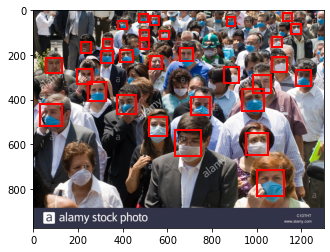

In [11]:
plot_detection_face_recognition(image,face_locations_cnn)

# Compara a quantidade de rostos que cada modelo consegue reconhecer
Serão  usadas todas as imagens da base original e também das adicionadas

In [12]:
print(current_path)
current_path = "D:\\FIA\\TCC\\BASES\\Base_crua_com_anotacoes"
contador_face_recognition_CNN = 0
image_list = [i for i in os.listdir(current_path) if str(i).endswith('.png')]
print(len(image_list))

D:\FIA\TCC\BASES\Base_crua_com_anotacoes\
2813


In [13]:
# import time

for foto in image_list:
    image = Image.open(current_path+"\\"+foto)
    #print(type(image))
    image = face_recognition.load_image_file(current_path+"\\"+foto)
    #print(type(image))
    #print(foto)
    #redim para sempre ter largura de 800 para tentar não estourar a mem
    image = imutils.resize(image, width=800, height=600 )
    #800 x 800 NOK
    #800x 600 OK
    #64 x 128
    contador_face_recognition_CNN += len(face_recognition.face_locations(image, model="cnn"))

print("total = 6821")
print(f"contador_face_recognition_CNN = {contador_face_recognition_CNN}")
# CPU 1208 --- sem imutils.resize  --- executed in 4h 24m 39s, finished 18:26:41 2020-08-28
# desafios encontrados, estourar memoria da GPU levou a tentar na CPU
# GPU 1957 --- com imutils.resize 800 por 600  ---  

total = 6821
contador_face_recognition_CNN = 4134
